In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = 'solar_generation_selected_features.csv'
solar_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its summary
solar_data.head(), solar_data.info(), solar_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               5856 non-null   float64
 1   dew                                5856 non-null   float64
 2   humidity                           5856 non-null   float64
 3   solarradiation                     5856 non-null   int64  
 4   windspeed                          5856 non-null   float64
 5   cloudcover                         5856 non-null   float64
 6   visibility                         5856 non-null   float64
 7   hour                               5856 non-null   int64  
 8   day_of_week                        5856 non-null   int64  
 9   month                              5856 non-null   int64  
 10  conditions_Clear                   5856 non-null   bool   
 11  conditions_Overcast                5856 non-null   bool 

(   temp   dew  humidity  solarradiation  windspeed  cloudcover  visibility  \
 0  74.5  47.8     38.80               0        7.8         0.0         9.9   
 1  73.5  48.8     41.62               0        8.6         0.0         9.9   
 2  71.7  49.9     46.29               0        4.8         0.0         9.9   
 3  70.6  51.0     49.91               0        6.9         0.0         9.8   
 4  67.9  52.7     58.26               0        5.5         0.0         9.9   
 
    hour  day_of_week  month  conditions_Clear  conditions_Overcast  \
 0     0            1      8              True                False   
 1     1            1      8              True                False   
 2     2            1      8              True                False   
 3     3            1      8              True                False   
 4     4            1      8              True                False   
 
    conditions_Partially cloudy  conditions_Rain  conditions_Rain, Overcast  \
 0               

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = solar_data.drop('Solar Production (kWh)', axis=1)
y = solar_data['Solar Production (kWh)']

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Splitting the data into training and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Further splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  

# Display the shapes of the train and test sets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape



((3513, 16), (1171, 16), (1172, 16), (3513,), (1171,), (1172,))

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Support Vector Regressor (using RBF kernel by default)
svm_regressor = SVR()

# Train the SVM model on the training data
svm_regressor.fit(X_train, y_train)


SVR()

In [23]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Predict the response for validation data
y_val_pred = svm_regressor.predict(X_val)

# Calculate performance metrics on validation data
mse_val = mean_squared_error(y_val, y_val_pred)  # Mean Squared Error
rmse_val = np.sqrt(mse_val)  # Root Mean Squared Error
r2_val = r2_score(y_val, y_val_pred)  # R-squared
mae_val = mean_absolute_error(y_val, y_val_pred)  # Mean Absolute Error

# Print validation metrics
print(f'SVM (Validation) RMSE: {rmse_val}')
print(f'SVM (Validation) R^2: {r2_val}')
print(f'SVM (Validation) MAE: {mae_val}')



SVM (Validation) RMSE: 0.7458408274023075
SVM (Validation) R^2: 0.7813600030966819
SVM (Validation) MAE: 0.37196641427929544


In [24]:
from sklearn.metrics import mean_absolute_error  # Ensure this is imported if not already

# Predicting on test set
y_test_pred = svm_regressor.predict(X_test)

# Calculating evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)  # Mean Squared Error
rmse_test = np.sqrt(mse_test)  # Root Mean Squared Error
r2_test = r2_score(y_test, y_test_pred)  # R-squared
mae_test = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error

# Printing test metrics
print(f'SVM (Test) RMSE: {rmse_test}')
print(f'SVM (Test) R^2: {r2_test}')
print(f'SVM (Test) MAE: {mae_test}')



SVM (Test) RMSE: 0.8037646750664976
SVM (Test) R^2: 0.7661040511327635
SVM (Test) MAE: 0.4015769021199507


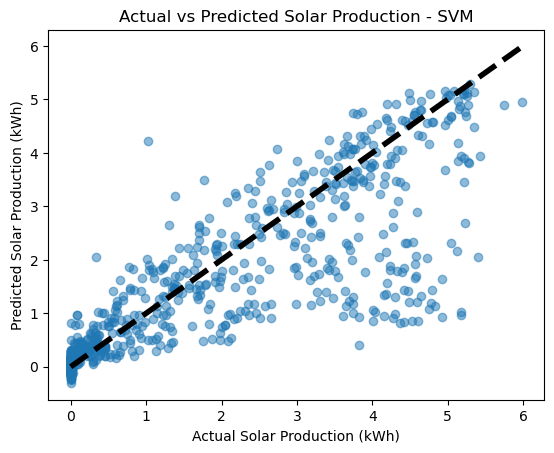

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the actual vs predicted values for visual comparison
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual Solar Production (kWh)')
plt.ylabel('Predicted Solar Production (kWh)')
plt.title('Actual vs Predicted Solar Production - SVM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line to show perfect prediction
plt.show()

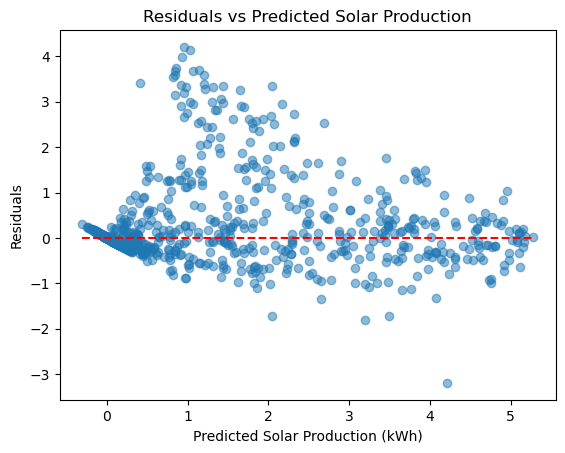

In [26]:
# Correcting the residuals plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Solar Production (kWh)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Solar Production')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--')
plt.show()

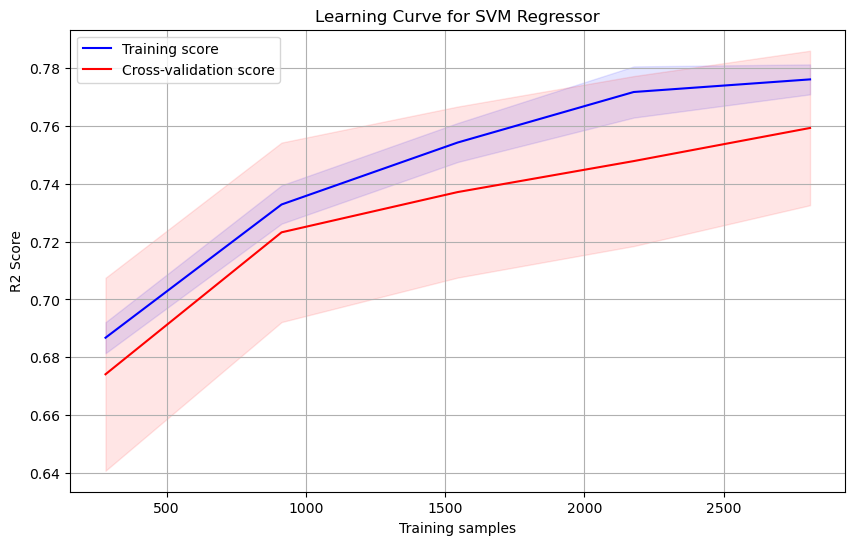

In [27]:
# Plot Learning Curves
train_sizes, train_scores, test_scores = learning_curve(svm_regressor, X_train, y_train, cv=5, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)
plt.title('Learning Curve for SVM Regressor')
plt.xlabel('Training samples')
plt.ylabel('R2 Score')
plt.legend()
plt.grid()
plt.show()
